## Imports

In [275]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

## Calculating ground truth values from blender output file

In [278]:
f = open("path_output_from_blender.txt")

# ground truth 
time = []
locX = []
locY = []
locZ = []
for l in f:
    sp = l.split()
    if sp[0] == 'F':
        time.append(int(sp[1]))
        locX.append(float(sp[2]))
        locY.append(float(sp[3]))
        locZ.append(float(sp[4]))


print(locX[0:3])
# Calculate velocity and acceleration ground truth 
p0X = locX[0]
p0Y = locY[0]
p0Z = locZ[0]
v0 = 0

velX = []
velY = []
velZ = []
for i in range(len(locX)):
    if i == 0: 
        dt = time[i]
        vx = (2*(locX[i]-p0X)/dt)-v0
        vy = (2*(locY[i]-p0Y)/dt)-v0
        vz = (2*(locZ[i]-p0Z)/dt)-v0
    else:
        dt = time[i]- time[i-1]
        vx = (2*(locX[i]-locX[i-1])/dt)-vx
        vy = (2*(locY[i]-locY[i-1])/dt)-vy
        vz = (2*(locZ[i]-locZ[i-1])/dt)-vz
    velX.append(vx)
    velY.append(vy)
    velZ.append(vz)

print(velX[0:3])

accX = []
accY = []
accZ = []
for i in range(len(velX)):
    if i == 0: 
        dt = time[i]
        ax = (velX[i]-v0)/dt
        ay = (velY[i]-v0)/dt
        az = (velZ[i]-v0)/dt

    else: 
        dt = time[i] - time[i-1]
        ax = (velX[i]-velX[i-1])/dt
        ay = (velY[i]-velY[i-1])/dt
        az = (velZ[i]-velZ[i-1])/dt

    accX.append(ax)
    accY.append(ay)
    accZ.append(az)
    
print(accX[0:3])
print(len(accX))

## Test calculating velocity and position backwards from acceleration
cvelX = []
cvelY = []
cvelZ = []
cvelX.append(v0)
cvelY.append(v0)
cvelZ.append(v0)
for i in range(len(accX)):
    if i == 0: 
        dt = time[i]
        vx = v0 + accX[i]*dt
        vy = v0 + accY[i]*dt
        vz = v0 + accZ[i]*dt

    else: 
        dt = time[i]- time[i-1]
        vx = vx + accX[i]*dt
        vy = vy + accY[i]*dt
        vz = vz + accZ[i]*dt

    cvelX.append(vx)
    cvelY.append(vy)
    cvelZ.append(vz)
print(cvelX[0:4])
print(len(cvelX))

cposX = []
cposY = []
cposZ = []
cposX.append(p0X)
cposY.append(p0Y)
cposZ.append(p0Z)

for i in range(len(accX)):
    if i == 0: 
        dt = time[i]
        px = p0X + cvelX[i]*dt + (1/2)*accX[i]*dt
        py = p0Y + cvelY[i]*dt + (1/2)*accY[i]*dt
        pz = p0Z + cvelZ[i]*dt + (1/2)*accZ[i]*dt


    else: 
        dt = time[i]- time[i-1]
        px = px + cvelX[i]*dt + (1/2)*accX[i]*dt
        py = py + cvelY[i]*dt + (1/2)*accY[i]*dt
        pz = pz + cvelZ[i]*dt + (1/2)*accZ[i]*dt


        
    cposX.append(px)
    cposY.append(py)
    cposZ.append(pz)

print(cposX[0:4])
print(len(cposX))

[-7.352397918701172, -7.27117395401001, -7.189751625061035]
[0.0, 0.16244792938232422, 0.000396728515625]
[0.0, 0.16244792938232422, -0.16205120086669922]
3000
[0, 0.0, 0.16244792938232422, 0.000396728515625]
3001
[-7.352397918701172, -7.352397918701172, -7.27117395401001, -7.189751625061035]
3001


## Grabing ground truth GPS values 
#### GPS tells location values 
#### GPS at 1Hz while Accelerometer is at 40Hz



[-7.352397918701172, -5.23198127746582, -4.812656402587891, -4.52042293548584]
[0.1445167064666748, -0.3681635856628418, -0.3953571319580078, -0.18602895736694336]
[4.712568283081055, 3.5300798416137695, 3.304816246032715, 3.174227714538574]


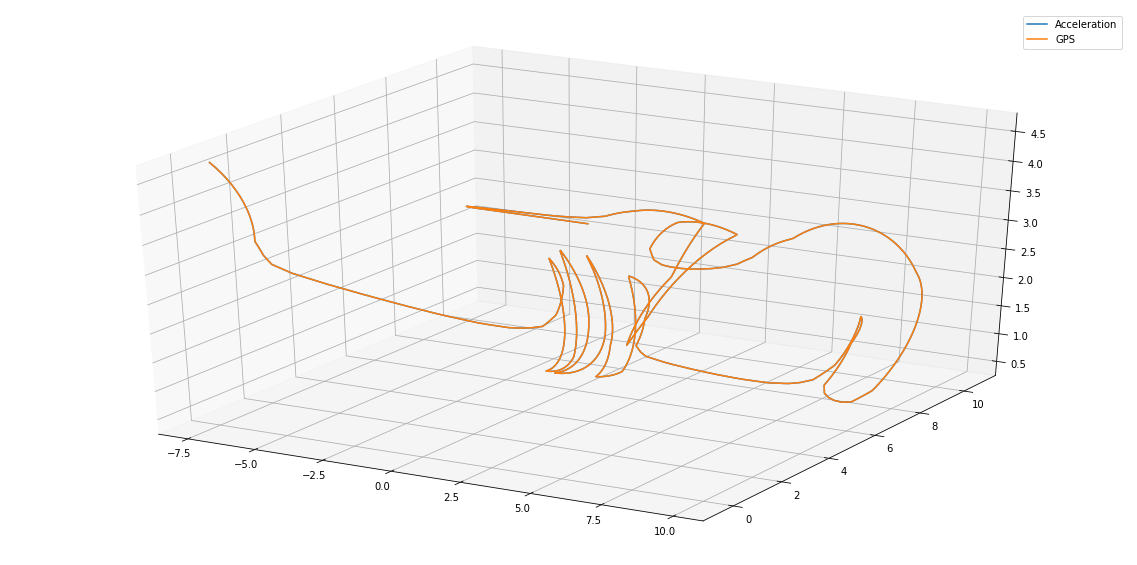

In [279]:
gpsX = []
gpsY = []
gpsZ = []
k = 40
for i in range(len(locX)):
    if k == 40:
        gpsX.append(locX[i])
        gpsY.append(locY[i])
        gpsZ.append(locZ[i])
        k = 0
    k = k + 1

print(gpsX[0:4])
print(gpsY[0:4])
print(gpsZ[0:4])

# Visualize in 3D 
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
ax.plot(locX, locY, locZ, label='Acceleration' )
ax.plot(cposX, cposY, cposZ, label='GPS' )
ax.legend()

plt.show()


## Simulated Accelerometer Value
#### From the previous steps, add noise to accX, accY, accZ 


[0.0, 0.16244792938232422, -0.16205120086669922]
[0.03459589256335127, 0.13409518252168687, -0.24191451916736034]


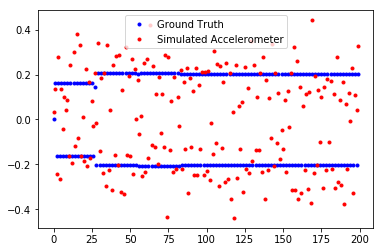

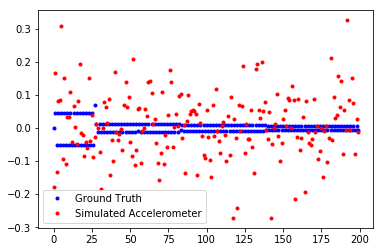

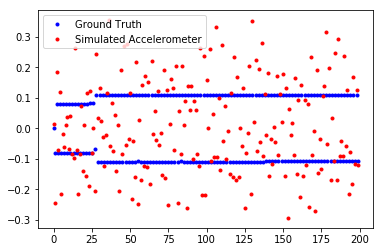

In [280]:
# Accelerometer noise parameters

# TODO: change these values 
# white gaussian noise 
acc_wu = 0
acc_wv = 0.0004

# bias
acc_bu = 0
acc_bv = 0.01

accRX = []
accRY = []
accRZ = []

for i in range(len(accX)):
    wnX = np.asscalar(np.random.normal(acc_wu,np.sqrt(acc_wv),1))
    bnX = np.asscalar(np.random.normal(acc_bu,np.sqrt(acc_bv),1))
    arX = accX[i] + wnX + bnX
    
    wnY = np.asscalar(np.random.normal(acc_wu,np.sqrt(acc_wv),1))
    bnY = np.asscalar(np.random.normal(acc_bu,np.sqrt(acc_bv),1))
    arY = accY[i] + wnY + bnY
    
    wnZ = np.asscalar(np.random.normal(acc_wu,np.sqrt(acc_wv),1))
    bnZ = np.asscalar(np.random.normal(acc_bu,np.sqrt(acc_bv),1))
    arZ = accZ[i] + wnZ + bnZ

    accRX.append(arX)
    accRY.append(arY)
    accRZ.append(arZ)

    
print(accX[0:3])
print(accRX[0:3])

plt.plot(accX[0:200],'b.')
plt.plot(accRX[0:200],'r.')
plt.legend(['Ground Truth','Simulated Accelerometer'])
plt.show()

plt.plot(accY[0:200],'b.')
plt.plot(accRY[0:200],'r.')
plt.legend(['Ground Truth','Simulated Accelerometer'])
plt.show()

plt.plot(accZ[0:200],'b.')
plt.plot(accRZ[0:200],'r.')
plt.legend(['Ground Truth','Simulated Accelerometer'])
plt.show()



## Simulated GPS value
#### Get gps position
#### TODO: find out if gps velocity noise is needed to be included
#### TODO: is there a bias for gps? 

In [281]:
# white gaussian noise 
gps_wu = 0
gps_wv = 0.1


gpsRX = []
gpsRY = []
gpsRZ = []

for i in range(len(gpsX)):
    wnX = np.asscalar(np.random.normal(gps_wu,np.sqrt(gps_wv),1))
    gpsRX.append(gpsX[i] + wnX)
    wnY = np.asscalar(np.random.normal(gps_wu,np.sqrt(gps_wv),1))
    gpsRY.append(gpsY[i] + wnY)
    wnZ = np.asscalar(np.random.normal(gps_wu,np.sqrt(gps_wv),1))
    gpsRZ.append(gpsZ[i] + wnZ)


## Calculated position and velocity from simulated acceleration (Not Used in the algorithm)


In [283]:
## Test calculating velocity and position backwards from acceleration
cvelRX = []
cvelRY = []
cvelRZ = []
cvelRX.append(v0)
cvelRY.append(v0)
cvelRZ.append(v0)
for i in range(len(accRX)):
    if i == 0: 
        dt = time[i]
        vx = v0 + accRX[i]*dt
        vy = v0 + accRY[i]*dt
        vz = v0 + accRZ[i]*dt

    else: 
        dt = time[i]- time[i-1]
        vx = vx + accRX[i]*dt
        vy = vy + accRY[i]*dt
        vz = vz + accRZ[i]*dt

    cvelRX.append(vx)
    cvelRY.append(vy)
    cvelRZ.append(vz)
print(cvelRX[0:4])
print(len(cvelRX))

cposRX = []
cposRY = []
cposRZ = []
cposRX.append(p0X)
cposRY.append(p0Y)
cposRZ.append(p0Z)

for i in range(len(accRX)):
    if i == 0: 
        dt = time[i]
        px = p0X + cvelRX[i]*dt + (1/2)*accRX[i]*dt
        py = p0Y + cvelRY[i]*dt + (1/2)*accRY[i]*dt
        pz = p0Z + cvelRZ[i]*dt + (1/2)*accRZ[i]*dt


    else: 
        dt = time[i]- time[i-1]
        px = px + cvelRX[i]*dt + (1/2)*accRX[i]*dt
        py = py + cvelRY[i]*dt + (1/2)*accRY[i]*dt
        pz = pz + cvelRZ[i]*dt + (1/2)*accRZ[i]*dt


        
    cposRX.append(px)
    cposRY.append(py)
    cposRZ.append(pz)

print(cposRX[0:4])
print(len(cposRX))

[0, 0.03459589256335127, 0.16869107508503814, -0.0732234440823222]
3001
[-7.352397918701172, -7.3350999724194965, -7.233456488595301, -7.185722673093943]
3001


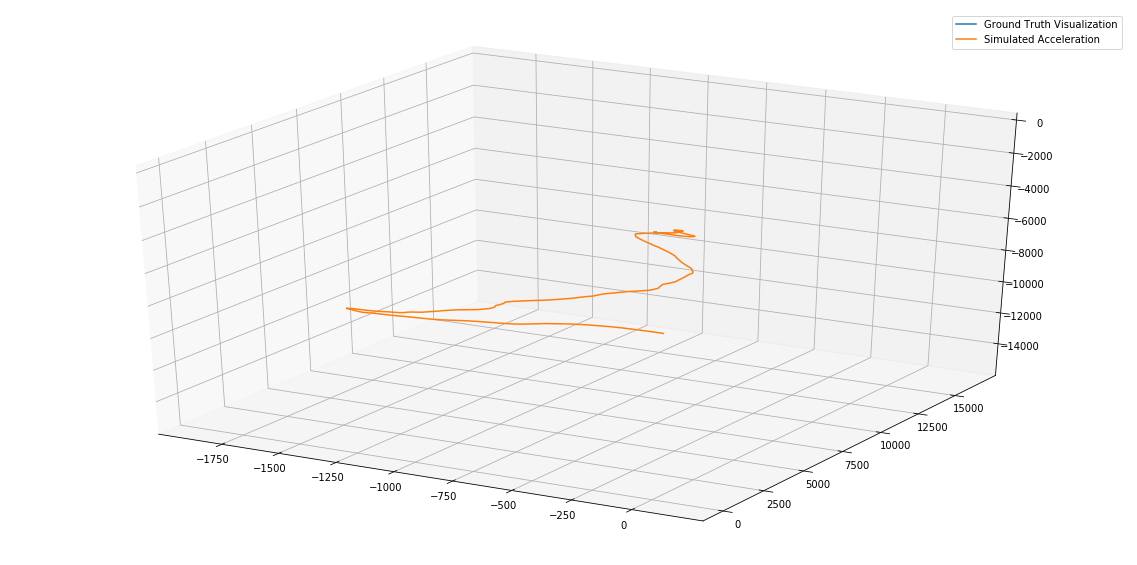

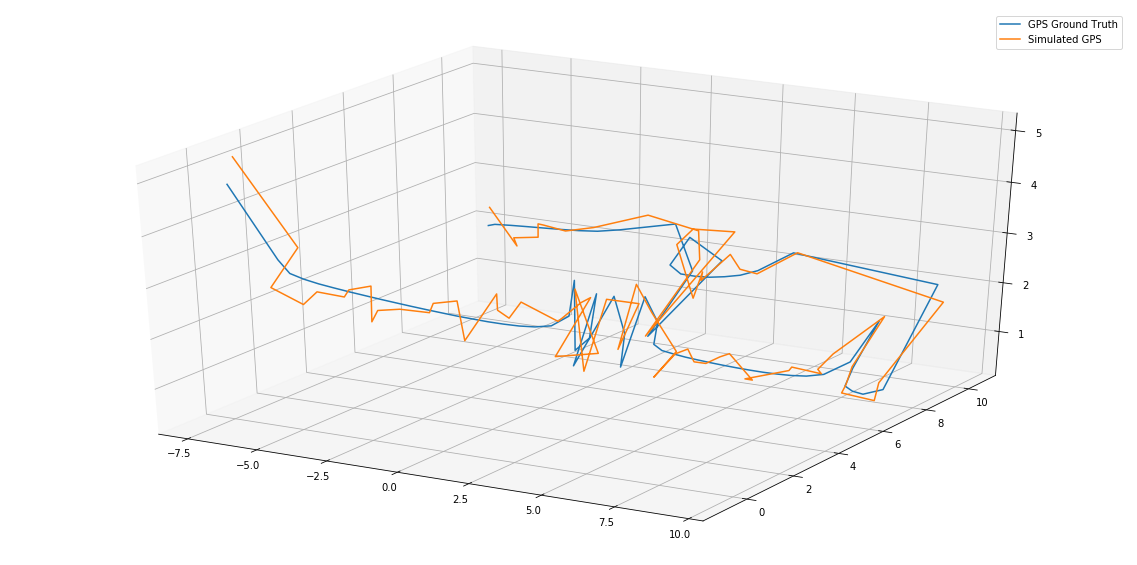

In [284]:
# Visualize in 3D 
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
ax.plot(locX, locY, locZ)
ax.plot(cposRX, cposRY, cposRZ)
ax.legend(['Ground Truth Visualization', 'Simulated Acceleration'])

plt.show()


# Visualize in 3D 
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
# ax.plot(locX, locY, locZ)
ax.plot(gpsX, gpsY, gpsZ)
ax.plot(gpsRX, gpsRY, gpsRZ)
ax.legend(['GPS Ground Truth', 'Simulated GPS'])

plt.show()



## Output as csv file

In [331]:
import csv 

with open('simulated_data.csv', 'w') as file:
    file.write("accX,accY,accZ\n")
    for i in range(len(accX)):
        file.write("%.6f,%.6f,%.6f\n" % (accRX[i], accRY[i], accRZ[i]))


## Example code for velocity and acceleration calculation

In [285]:
loc = [1,3,5,2,6]

# Calculate velocity and acceleration ground truth 
p0 = 0
v0 = 0

print(loc)

vel = []
for i in range(len(loc)):
    if i == 0: 
        dt = time[i]
        v = (2*(loc[i]-p0)/dt)-v0
    else:
        dt = time[i]- time[i-1]
        v = (2*(loc[i]-loc[i-1])/dt)-v
    vel.append(v)

print(vel)

acc = []
for i in range(len(vel)):
    if i == 0: 
        dt = time[i]
        a = (vel[i]-v0)/dt
    else: 
        dt = time[i] - time[i-1]
        a = (vel[i]-vel[i-1])/dt
    acc.append(a)
    
print(acc)

cv = []
cv.append(v0)
for i in range(len(acc)):
    if i == 0: 
        dt = time[i]
        v = v0 + acc[i]*dt
    else: 
        dt = time[i]- time[i-1]
        v = v + acc[i]*dt
    cv.append(v)
print(cv)


cp = []
cp.append(p0)
for i in range(len(acc)):
    if i == 0: 
        dt = time[i]
        p = p0 + cv[i]*dt + (1/2)*acc[i]*dt
    else: 
        dt = time[i]- time[i-1]
        p = p + cv[i]*dt + (1/2)*acc[i]*dt
        
    cp.append(p)
print(cp)

[1, 3, 5, 2, 6]
[2.0, 2.0, 2.0, -8.0, 16.0]
[2.0, 0.0, 0.0, -10.0, 24.0]
[0, 2.0, 2.0, 2.0, -8.0, 16.0]
[0, 1.0, 3.0, 5.0, 2.0, 6.0]
